In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm

DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\Covid19machinelearning\\traincategories"

In [2]:
Covid19xray_path = os.path.join(DATADIR, 'Covid19xray')
ViralPneumonia_path = os.path.join(DATADIR, 'ViralPneumonia')
Normalxray_path = os.path.join(DATADIR, 'Normalxray')

In [3]:
print(len(os.listdir(ViralPneumonia_path)))

70


In [4]:
print(len(os.listdir(Covid19xray_path)))

111


In [5]:
print(len(os.listdir(Normalxray_path)))

70


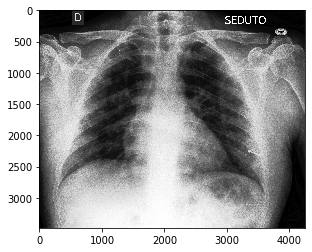

In [6]:
CATEGORIES = ["Covid19xray","ViralPneumonia", "Normalxray"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [7]:
print(img_array.shape)

(3480, 4248)


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import cv2
import tqdm as tqdm

DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\Covid19machinelearning\\traincategories"

CATEGORIES = ["Covid19xray","ViralPneumonia", "Normalxray"]

IMG_SIZE = 128
def create_training_data():
    training_data = []
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=Leukemia, 1=Healthy
        Covid19xray_path = os.path.join(DATADIR, 'Covid19xray')
        ViralPneumonia_path = os.path.join(DATADIR, 'ViralPneumonia')
        Normalxray_path = os.path.join(DATADIR, 'Normalxray')
        #print(path)
        #print(os.listdir(path))
        for img in os.listdir(path):  # iterate over each of the classes
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
    return training_data

    #DEFINE IMAGE SIZE

In [9]:
training_data = create_training_data()     

In [10]:
len(training_data) #I have  1126 images including Leukemia and White Blood Cells

251

In [11]:
import random


random.shuffle(training_data)
#Shuffling the data in order to ensure that the machine does not learn just Leukemia or White BLood cells. Allows for a variety in data.
#Shuffles the new training data created, is a mutable list, does not print out anything
for sample in training_data [:15]: #Printed out 10 samples
    print(sample[1])

2
0
1
0
0
0
1
0
0
2
0
2
2
0
0


In [13]:
training_data[0][0]

array([[ 0,  0,  0, ..., 67, 60, 63],
       [ 0,  0,  0, ..., 70, 60, 65],
       [ 0,  0,  0, ..., 74, 66, 70],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [14]:
X = []
y = []

for features,label in training_data:
     
    X.append(features)
    y.append(label)
X = np.array(X)   # (112, 150, 150, 3)
y = np.array(y) 

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #Needs to be 3, because of Color, in terms of Matplotlib

In [15]:
X.shape, y.shape

((251, 128, 128, 1), (251,))

In [16]:
y #Summary of array of labels

array([2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 0,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2,
       1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0,
       1, 0, 0, 0, 1, 2, 0, 1, 0])

In [17]:
# 0=Covid19, 1=ViralPneumonia, 2=Normal Xray

In [18]:
X.shape

(251, 128, 128, 1)

In [19]:
y.shape

#Shape of array

(251,)

In [20]:
X.shape[1:]

(128, 128, 1)

In [21]:
from tensorflow.keras.utils import to_categorical
y_binary = to_categorical(y)
#Binary Values: 0= 1 0 0    1= 0 1 0  2=0 0 1

In [25]:
#y_binary
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)

In [26]:
class_weights

array([0.75375375, 1.1952381 , 1.1952381 ])

In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import pickle
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
cw = class_weight.compute_class_weight('balanced', np.unique(y), y)
y_binary = to_categorical(y)

#pickle_in = open("X.pickle","rb")  #Features
#X = pickle.load(pickle_in)
#There is an easier way to write this but a two part process..
#pickle_in = open("y.pickle","rb")
#y = pickle.load(pickle_in) #Labels
#Next we are going to orginize and scale the data in terms of pixles. The Max amount of pixels is 255, min is 0. The code will help scale the data
#X = np.array(X/255.0)
X = X/255.0
#y = np.array(y) #need to specify numpy array or it won't work, trainig data needs to be in a numpy array and it was not in it before, so we called on it
#Features of the convolutional pooling divided by 255 pixels, scaling data between 0 and 1
#Starting on different layers
model = Sequential() #Utilizing above sequential data
#Starting initial conovlutional and max pooling steps

model.add(Conv2D(64, (3, 3), input_shape= X.shape[1:])) #[Refer to above model and notes to learn more about convolution'uses 3 by 3 array for features]
#Conv layers and perameters
#Starting with the initial convolutional layer, which goes through finding the best features and puting it into the X features list variables
model.add(BatchNormalization())
model.add(Activation('relu')) # Activating 'relu', which allows for better functions and pooling in python

model.add(MaxPooling2D(pool_size=(2, 2)))#Shape the data into a 2 by2 array in terms of pooling size. 
#Max pooling is avtivated which tries to find the largest numerical value in terms of the original convolution, Activaation layer
#Redoing the above steps, but this time without input into the Features, as it already knows to do so in terms of Conv2D
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#The above was the Second Layer, now we have a 2 by 64 layer convolutional nueral network
model.add(Flatten())  

model.add(Dense(64)) #[Density of layer]
#Next layer in terms of poolingHOw
model.add(Dense(3))
model.add(Activation('softmax')) #Sigmoid takes data and returns and output value between -1 and 1, as seen in code above, when we were classifying data
#Sigmoids create 'S' curves, and nonlinear fucntions in terms of pixels curvature of pixels

model.compile(loss='categorical_crossentropy', #There are two types; Bianary crossen trophy and Categorical crossentrophy. 
              #Categorical Crossentrophy only always one to be classified as one class or another, while binary crossentrophy, allows for greater margin of error and multiclassfication
             #So it is not a one or another type of thing, it is more acurate and lenitent.
              optimizer=Adam(learning_rate=0.0001,amsgrad=True),
              metrics=['accuracy'])

history=model.fit(X, y_binary, batch_size=6, epochs=30, validation_split=0.1,class_weight=cw)
                   
#tf.keras.callbacks.History()

#Adjust Batch size to lower loss, mutliples of 2

#Epoch increases and decreases acuracy depending on the amount of time it went thorugh and learned the 'dataset'
#3 times means it went thorugh 3 times, it increases and decrase acuracy based on that

#So this is actually bulidng the layers of a machine learning network, and using the trianing data
#Labels, and feature, or X and Y varibles, are ensured in this model
#I personally put the batch size to 32, so the classifier would process 40 images at a time,because I don't want negative results, and have minimal samples
#Essentially bach size stops errors
#Split Validation predicts the 'fit' of the model to a training set. It increases as the 'learning' and epoch repitations take place

Train on 225 samples, validate on 26 samples
Epoch 1/30
225/225 [==============================] - 30s 131ms/sample - loss: 1.2626 - accuracy: 0.7689 - val_loss: 0.7365 - val_accuracy: 0.7692
Epoch 2/30
225/225 [==============================] - 25s 110ms/sample - loss: 0.3170 - accuracy: 0.8933 - val_loss: 0.7414 - val_accuracy: 0.8846
Epoch 3/30
225/225 [==============================] - 25s 109ms/sample - loss: 0.0433 - accuracy: 0.9822 - val_loss: 0.6664 - val_accuracy: 1.0000
Epoch 4/30
225/225 [==============================] - 25s 109ms/sample - loss: 0.0216 - accuracy: 0.9956 - val_loss: 0.5715 - val_accuracy: 1.0000
Epoch 5/30
225/225 [==============================] - 25s 110ms/sample - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.4902 - val_accuracy: 1.0000
Epoch 6/30
225/225 [==============================] - 25s 111ms/sample - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.4030 - val_accuracy: 1.0000
Epoch 7/30
225/225 [==============================] - 25s 109ms/sample - 

<function matplotlib.pyplot.show(*args, **kw)>

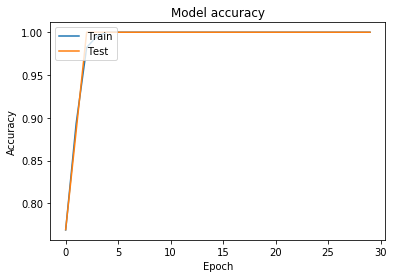

In [28]:
#Training and validation accuracy values 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import tqdm as tqdm

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show

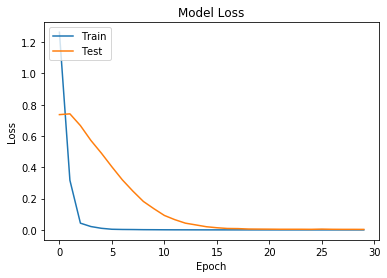

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import cv2
import tqdm as tqdm
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],loc='upper left')
plt.show()

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [32]:
model.save('Covid19chestrayxrayclassifierSiriNallamothuyes_iden.h5') #Saves the model

In [1]:
from tensorflow.keras.models import load_model
# load model
model = load_model('Covid19chestrayxrayclassifierSiriNallamothuyes_iden.h5') #Run this piece of code to load model when testing

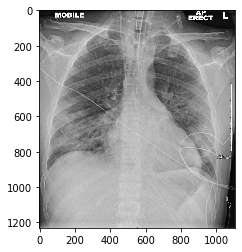

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from tqdm import tqdm

DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\Covid19machinelearning\\testcovid"

img_array = cv2.imread(DATADIR+'\\COVID-00003b.jpg' , cv2.IMREAD_GRAYSCALE)  # convert to array


plt.imshow(img_array, cmap='gray')  # graph it
plt.show()  # display!

#prepare(DATADIR+'\dipper')


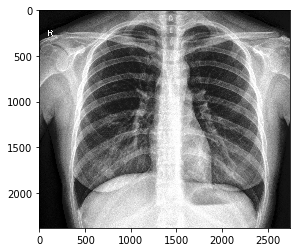

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from tqdm import tqdm

DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\Covid19machinelearning\\traincategories\\Normalxray"

img_array = cv2.imread(DATADIR+'\\02.jpeg' , cv2.IMREAD_GRAYSCALE)  # convert to array


plt.imshow(img_array, cmap='gray')  # graph it

plt.show()  # display!
#prepare(DATADIR+'\dipper')



In [105]:
# 0=Covid19, 1=ViralPneumonia, 2=Normal Xray

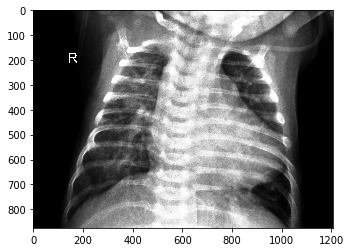

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from tqdm import tqdm

DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\Covid19machinelearning\\testpneumonia"

img_array = cv2.imread(DATADIR+'\\trial.jpeg' , cv2.IMREAD_GRAYSCALE)  # convert to array


plt.imshow(img_array, cmap='gray')  # graph it
plt.show()  # display!
#prepare(DATADIR+'\dipper')


In [78]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\Covid19machinelearning\\testpneumonia"

CATEGORIES = ["Covid19xray","ViralPneumonia", "Normalxray"]

IMG_SIZE = 128
def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/1.0         #/255.0


#model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict_classes([prepare(DATADIR+'\\trial.jpeg')])
pred_proba = model.predict_proba([prepare(DATADIR+'\\trial.jpeg')])
print(prediction)  # will be a list in a list.
print('Probabilities: ', pred_proba)


if prediction == 0:
  print('Covid-19')
if prediction == 1:
  print('Viral Pneumonia')
if prediction == 2:
  print('Normal')



[1]
Probabilities:  [[0. 1. 0.]]
Viral Pneumonia


In [80]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\Covid19machinelearning\\testcovid"

CATEGORIES = ["Covid19xray","ViralPneumonia", "Normalxray"]

IMG_SIZE = 128
def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/1.0         #/255.0


#model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict_classes([prepare(DATADIR+'\\COVID-00003b.jpg')])
pred_proba = model.predict_proba([prepare(DATADIR+'\\COVID-00003b.jpg')])

print(prediction)  # will be a list in a list.
print(pred_proba)

if prediction == 0:
  print('Covid-19')
if prediction == 1:
  print('Viral Pneumonia')
if prediction == 2:
  print('Normal')


[0]
[[1. 0. 0.]]
Covid-19


In [3]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\Covid19machinelearning\\testcovid"

CATEGORIES = ["Covid19xray","ViralPneumonia", "Normalxray"]

IMG_SIZE = 128
def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/1.0         #/255.0


#model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict_classes([prepare(DATADIR+'\\0111.jpg')])
print(prediction)  # will be a list in a list.

if prediction == 0:
  print('Covid-19')
if prediction == 1:
  print('Viral Pneumonia')
if prediction == 2:
  print('Normal')


[0]
Covid-19


In [65]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\Covid19machinelearning\\testnormal"

CATEGORIES = ["Covid19xray","ViralPneumonia", "Normalxray"]

IMG_SIZE = 128
def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/1.0       



prediction = model.predict_classes([prepare(DATADIR+'\\normal6.jpeg')])
print(prediction)  # will be a list in a list.

if prediction == 0:
  print('Covid-19')
if prediction == 1:
  print('Viral Pneumonia')
if prediction == 2:
  print('Normal')


[2]
Normal


In [66]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\Covid19machinelearning\\testnormal"

CATEGORIES = ["Covid19xray","ViralPneumonia", "Normalxray"]

IMG_SIZE = 128
def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/1.0         

prediction = model.predict_classes([prepare(DATADIR+'\\normal07.jpeg')])
print(prediction)  # will be a list in a list.

if prediction == 0:
  print('Covid-19')
if prediction == 1:
  print('Viral Pneumonia')
if prediction == 2:
  print('Normal')


[2]
Normal


In [3]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\Covid19machinelearning\\testpneumonia"

CATEGORIES = ["Covid19xray","ViralPneumonia", "Normalxray"]

IMG_SIZE = 128
def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/1.0         #/255.0


#model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict_classes([prepare(DATADIR+'\\0117.jpeg')])
print(prediction)  # will be a list in a list.

if prediction == 0:
  print('Covid-19')
if prediction == 1:
  print('Viral Pneumonia')
if prediction == 2:
  print('Normal')

print ("The probability for Covid-19, Viral Pneumonia, and the Probability of having a Normal X-ray is displayed:{}%".format(model.predict([prepare(DATADIR+'\\0117.jpeg')])*100))
print("[0,1,2]")
print("[Covid-19,Viral Pneumonia,Normal X-ray]")



[1]
Viral Pneumonia
The probability for Covid-19, Viral Pneumonia, and the Probability of having a Normal X-ray is displayed:[[  0. 100.   0.]]%
[0,1,2]
[Covid-19,Viral Pneumonia,Normal X-ray]


In [4]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\Covid19machinelearning\\testpneumonia"

CATEGORIES = ["Covid19xray","ViralPneumonia", "Normalxray"]

IMG_SIZE = 128
def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/1.0         #/255.0


#model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict_classes([prepare(DATADIR+'\\0107.jpeg')])
print(prediction)  # will be a list in a list.

if prediction == 0:
  print('Covid-19')
if prediction == 1:
  print('Viral Pneumonia')
if prediction == 2:
  print('Normal')

print ("The probability for Covid-19, Viral Pneumonia, and the Probability of having a Normal X-ray is displayed:{}%".format(model.predict([prepare(DATADIR+'\\0117.jpeg')])*100))
print("[0,1,2]")
print("[Covid-19,Viral Pneumonia,Normal X-ray]")

[1]
Viral Pneumonia
The probability for Covid-19, Viral Pneumonia, and the Probability of having a Normal X-ray is displayed:[[  0. 100.   0.]]%
[0,1,2]
[Covid-19,Viral Pneumonia,Normal X-ray]


In [6]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\Covid19machinelearning\\testnormal"

CATEGORIES = ["Covid19xray","ViralPneumonia", "Normalxray"]

IMG_SIZE = 128
def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/1.0         #/255.0


#model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict_classes([prepare(DATADIR+'\\normal07.jpeg')])
print(prediction)  # will be a list in a list.

if prediction == 0:
  print('Covid-19')
if prediction == 1:
  print('Viral Pneumonia')
if prediction == 2:
  print('Normal')

print ("The probability for Covid-19, Viral Pneumonia, and the Probability of having a Normal X-ray is displayed:{}%".format(model.predict([prepare(DATADIR+'\\normal07.jpeg')])*100))
print("[0,1,2]")
print("[Covid-19,Viral Pneumonia,Normal X-ray]")

[2]
Normal
The probability for Covid-19, Viral Pneumonia, and the Probability of having a Normal X-ray is displayed:[[  0.   0. 100.]]%
[0,1,2]
[Covid-19,Viral Pneumonia,Normal X-ray]


In [7]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\Covid19machinelearning\\testcovid"

CATEGORIES = ["Covid19xray","ViralPneumonia", "Normalxray"]

IMG_SIZE = 128
def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/1.0         #/255.0


#model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict_classes([prepare(DATADIR+'\\COVID-00033.jpg')])
print(prediction)  # will be a list in a list.

if prediction == 0:
  print('Covid-19')
if prediction == 1:
  print('Viral Pneumonia')
if prediction == 2:
  print('Normal')

print ("The probability for Covid-19, Viral Pneumonia, and the Probability of having a Normal X-ray is displayed:{}%".format(model.predict([prepare(DATADIR+'\\COVID-00033.jpg')])*100))
print("[0,1,2]")
print("[Covid-19,Viral Pneumonia,Normal X-ray]")

[0]
Covid-19
The probability for Covid-19, Viral Pneumonia, and the Probability of having a Normal X-ray is displayed:[[100.   0.   0.]]%
[0,1,2]
[Covid-19,Viral Pneumonia,Normal X-ray]
